In [1]:
import pandas as pd

from preprocessing import check_and_transform_postcode

In [2]:
df = pd.read_csv("../data/interview_signup.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318345 entries, 0 to 318344
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   original_product_name  318345 non-null  object 
 1   postcode               318345 non-null  object 
 2   bundesland             288813 non-null  object 
 3   total_bonus            318345 non-null  float64
 4   order_date             318345 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.1+ MB


/tmp/ipykernel_126952/4243634050.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/interview_signup.csv")


In [3]:
df.head()

,original_product_name,postcode,bundesland,total_bonus,order_date
0,E.ON STROM,53229.0,Nordrhein-Westfalen,146.0,2018-01-01
1,E.ON STROM ÖKO,74235.0,Baden-Württemberg,67.0,2018-01-01
2,E.ON STROM ÖKO 24,45257.0,Nordrhein-Westfalen,123.0,2018-01-01
3,E.ON STROM,64395.0,Hessen,159.0,2018-01-01
4,E.ON STROM 24,36039.0,Hessen,116.0,2018-01-01


In [4]:
df.describe(include='all')

,original_product_name,postcode,bundesland,total_bonus,order_date
count,318345,318345.0,288813,318345.000000,318345
unique,10,20525.0,16,NaN,365
top,E.ON STROM,31515.0,Nordrhein-Westfalen,NaN,2018-09-05
freq,164473,332.0,68541,NaN,960
mean,NaN,NaN,NaN,150.590275,NaN
std,NaN,NaN,NaN,53.692176,NaN
min,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,112.000000,NaN
50%,NaN,NaN,NaN,149.000000,NaN
75%,NaN,NaN,NaN,182.000000,NaN


In [5]:
df['bundesland'].unique()

array(['Nordrhein-Westfalen', 'Baden-Württemberg', 'Hessen', 'Berlin',
       'Schleswig-Holstein', 'Niedersachsen', nan, 'Bayern',
       'Rheinland-Pfalz', 'Sachsen', 'Bremen', 'Brandenburg', 'Thüringen',
       'Saarland', 'Mecklenburg-Vorpommern', 'Hamburg', 'Sachsen-Anhalt'],
      dtype=object)

In [6]:
df.isna().sum()

original_product_name        0
postcode                     0
bundesland               29532
total_bonus                  0
order_date                   0
dtype: int64

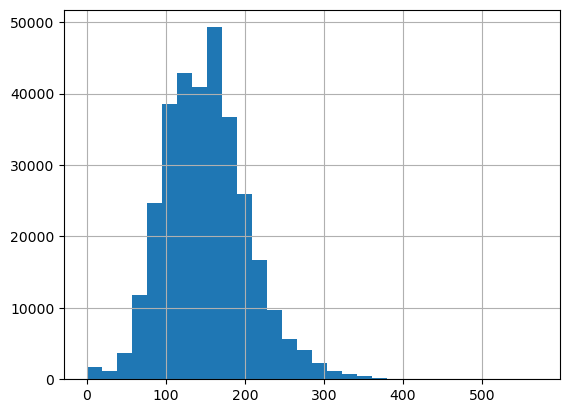

In [7]:
df.total_bonus.hist(bins=30);

### 'postcode' column cleaning

In [8]:
df = pd.read_csv("../data/interview_signup.csv", dtype={'postcode': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318345 entries, 0 to 318344
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   original_product_name  318345 non-null  object 
 1   postcode               318345 non-null  object 
 2   bundesland             288813 non-null  object 
 3   total_bonus            318345 non-null  float64
 4   order_date             318345 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.1+ MB


In [9]:
df['postcode'].unique()

array(['53229', '74235.0', '45257', ..., '79424.0', '27246.0', '67473.0'],
      dtype=object)

In [10]:
df['postcode'].nunique()

15814

In [11]:
df.head()

,original_product_name,postcode,bundesland,total_bonus,order_date
0,E.ON STROM,53229,Nordrhein-Westfalen,146.0,2018-01-01
1,E.ON STROM ÖKO,74235.0,Baden-Württemberg,67.0,2018-01-01
2,E.ON STROM ÖKO 24,45257,Nordrhein-Westfalen,123.0,2018-01-01
3,E.ON STROM,64395,Hessen,159.0,2018-01-01
4,E.ON STROM 24,36039,Hessen,116.0,2018-01-01


In [12]:
df['postcode'] = df['postcode'].apply(lambda x: x.strip('.0'))
df.head()

,original_product_name,postcode,bundesland,total_bonus,order_date
0,E.ON STROM,53229,Nordrhein-Westfalen,146.0,2018-01-01
1,E.ON STROM ÖKO,74235,Baden-Württemberg,67.0,2018-01-01
2,E.ON STROM ÖKO 24,45257,Nordrhein-Westfalen,123.0,2018-01-01
3,E.ON STROM,64395,Hessen,159.0,2018-01-01
4,E.ON STROM 24,36039,Hessen,116.0,2018-01-01


In [13]:
df['postcode'].nunique()

8084

In [14]:
df = check_and_transform_postcode(df.copy())

Found 1 postcodes with non-numeric values in column 'postcode'.
266922    92696JAVAS
Name: postcode, dtype: object
Found 39095 postcodes with invalid length (not 5 digits) in column 'postcode'.


In [15]:
df['postcode'].nunique()

8084

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318345 entries, 0 to 318344
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   original_product_name  318345 non-null  object 
 1   postcode               318345 non-null  object 
 2   bundesland             288813 non-null  object 
 3   total_bonus            318345 non-null  float64
 4   order_date             318345 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.1+ MB


### Converting 'order_date' column to datetime

In [17]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_date'].dtype # dtype('<M8[ns]'): a datetime data type with nanosecond (ns) precision

dtype('<M8[ns]')